In [1]:
import requests
import pandas as pd                            
import re                                      
import numpy as np
import os
import datetime
from bs4 import BeautifulSoup                          
import json
import seaborn as sns

import matplotlib                              
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42       

%matplotlib inline                             

In [3]:
df = pd.read_csv("fed_law_data.csv")

In [4]:
df = df.drop(columns=['CITATION', 'DECISION', 'DECISION2', 'AREA2', 'STAT CITE'])

In [13]:
df['AREA1'] = df.AREA1.astype(str)

In [9]:
df.EFFECT.str.contains("struck down as face").value_counts()

False    1308
Name: EFFECT, dtype: int64

In [10]:
df['EFFECT'] = df.EFFECT.str.replace("struck down as face", "struck down on face")

In [20]:
df['AREA1'] = df.AREA1.str.replace(r"5","Federalism")

In [21]:
df.tail()

,CASE,DATE,YEAR,DECADE,EFFECT,STAT NAME,PL #,S-DATE,TIME TO DECISION,CONGRESS,AREA1,LNDMRK,LNDDTL,ATT GEN,CERT,REVERSD,CRS,GVT PRTY,DISSENT,H-CT
1303,"Oil States Energy Services, LLC v. Greene's En...",4/24/18,2018,2010,upheld,Leahy-Smith America Invents Act,112-29,9/16/11,79,112,Separation of Powers,1.0,0.0,1,1,0.0,NaN,0,2,0
1304,Murphy v. National Collegiate Athletic Associa...,5/14/18,2018,2010,struck down on face,Professional and Amateur Sports Protection Act,102-559,10/28/92,415,102,Federalism,0.0,0.0,1,1,1.0,NaN,0,3,1
1305,Carpenter v. United States,6/22/18,2018,2010,struck down as applied,USA PATRIOT Act,107-56,10/26/01,212,107,Due Process,1.0,0.0,1,1,1.0,NaN,1,4,0
1306,Artis v. District of Columbia,1/22/18,2018,2010,upheld,Judicial Improvements Act of 1990,101-650,12/1/90,326,101,Federalism,1.0,0.0,0,1,1.0,NaN,1,4,1
1307,Patchak v. Zinke,2/27/18,2018,2010,upheld,Gun Lake Act,113-179,9/26/14,41,113,Separation of Powers,NaN,NaN,1,1,0.0,NaN,1,3,0


In [22]:
df.to_csv("fed_law_data_altered.csv",index=False)

In [2]:
df = pd.read_csv("fed_law_data_altered.csv")

### Analysis

##### chart 1: decision time over decades (line chart)

In [3]:
df['TIME TO DECISION'].mean()

180.93577981651376

In [ ]:
#make new df with everything grouped by AREA and the mean time

In [77]:
df1 = df[['AREA1', 'DECADE', 'TIME TO DECISION']]

In [78]:
df1.head()

,AREA1,DECADE,TIME TO DECISION
0,Separation of Powers,1790,23
1,Federalism,1790,177
2,Federalism,1790,21
3,Separation of Powers,1790,28
4,Federalism,1800,131


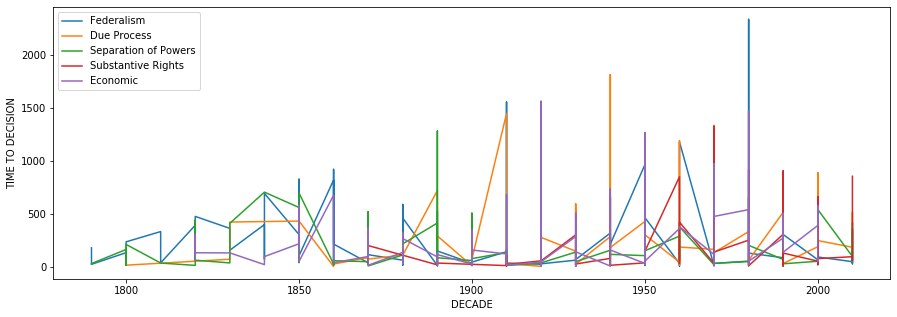

In [66]:
#Q: How do I get the time to mean, this is summed up i assume..?

fig,ax = plt.subplots(figsize=(15,5))

for area in ['Federalism','Due Process','Separation of Powers', 'Substantive Rights', 'Economic']:
    ax.plot(df[df.AREA1==area]['DECADE'],df[df.AREA1==area]['TIME TO DECISION'],label=area)

ax.set_xlabel("DECADE")
ax.set_ylabel("TIME TO DECISION")
ax.legend(loc='best')

##### chart 2 & 3: cases over decade (stacked with issue area & effect)




In [5]:
df2 = df[['DECADE', 'AREA1']].groupby(by='DECADE')['AREA1'].agg('value_counts').unstack().fillna(0)

In [6]:
df2['DECADE2'] = df2.index

In [7]:
df2.head(1)

AREA1,Due Process,Economic,Equality,Federalism,Separation of Powers,Substantive Rights,DECADE2
DECADE,,,,,,,
1790,0.0,0.0,0.0,2.0,2.0,0.0,1790


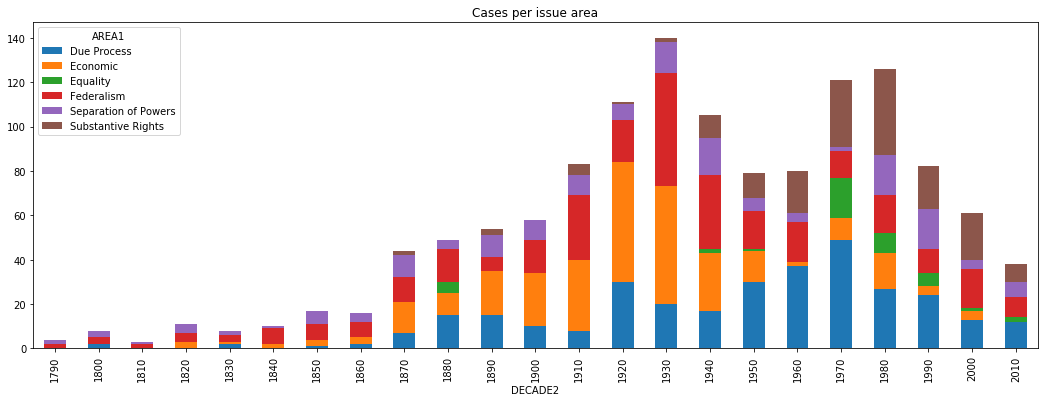

In [8]:
df2.plot(x='DECADE2', y=['Due Process', 'Economic', 'Equality', 'Federalism', 'Separation of Powers', 'Substantive Rights'], kind='bar', stacked=True, figsize=(18,6), title='Cases per issue area')

In [9]:
df3 = df[['DECADE', 'EFFECT']].groupby(by='DECADE')['EFFECT'].agg('value_counts').unstack().fillna(0)

In [10]:
df3['DECADE2'] = df3.index

In [11]:
df3.head(1)

EFFECT,struck down as applied,struck down on face,upheld,DECADE2
DECADE,,,,
1790,0.0,1.0,3.0,1790


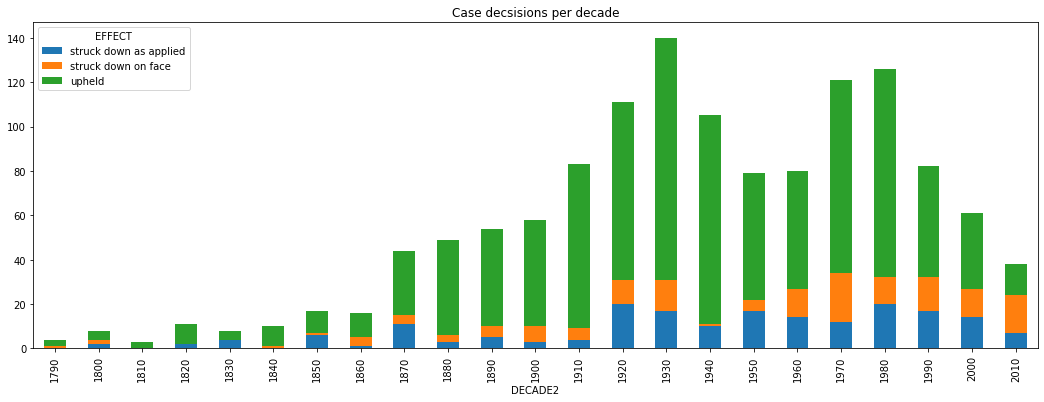

In [12]:
df3.plot(x='DECADE2', y=['struck down as applied', 'struck down on face', 'upheld'], kind='bar', stacked=True, figsize=(18,6), title='Case decsisions per decade')

##### chart 4: issue area barh effect distribution

In [13]:
df4 = df[['AREA1', 'EFFECT']].groupby(by='AREA1')['EFFECT'].agg('value_counts').unstack().fillna(0)

In [14]:
df4.head()

EFFECT,struck down as applied,struck down on face,upheld
AREA1,,,
Due Process,61,33,227
Economic,40,22,233
Equality,4,11,29
Federalism,38,28,250
Separation of Powers,15,26,121


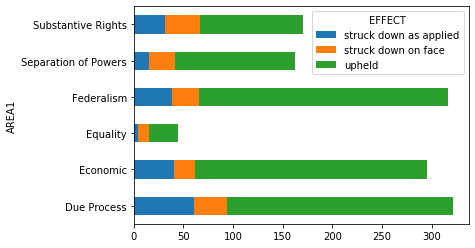

In [15]:
df4.plot(kind='barh', stacked=True)

##### chart 5: revisions per case

In [33]:
df5 = df[['AREA1', 'REVERSD']].groupby(by='AREA1')['REVERSD'].agg('value_counts').unstack().fillna(0)

In [25]:
df5['cases'] = df.groupby(by='AREA1').REVERSD.count()

In [41]:
df5['rpc'] = df5[1.0] / df5['cases']

In [51]:
df5 = df5.drop(columns=[1.0, 0.0, 'cases'])

In [52]:
df5.head()

REVERSD,rpc
AREA1,
Due Process,0.523364
Economic,0.418367
Equality,0.545455
Federalism,0.417722
Separation of Powers,0.320988


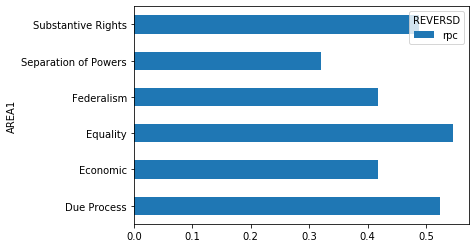

In [53]:
df5.plot(kind='barh')

##### chart 6: time to decision over decade scatter plot


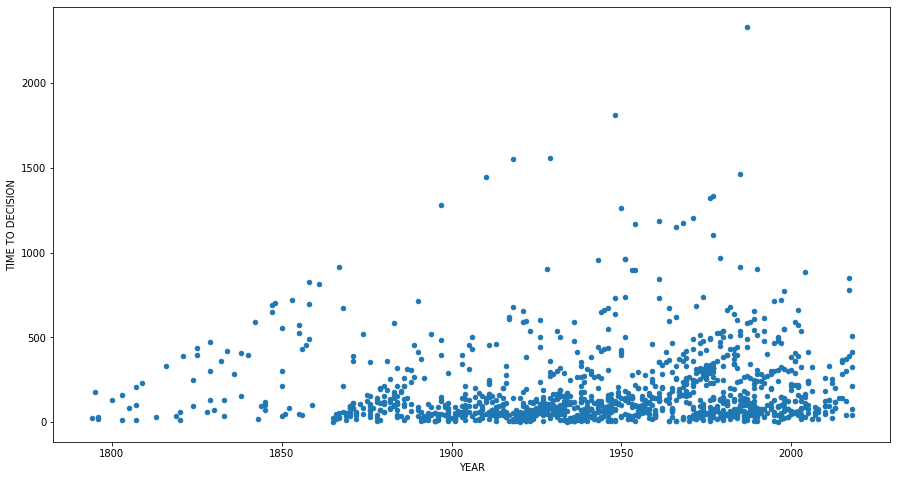

In [60]:
# color bubbles?
df.plot(kind='scatter', x='YEAR', y='TIME TO DECISION', figsize=(15,8))

In [98]:
from matplotlib import pyplot
sns.set(rc={'figure.figsize':(100, 20)})

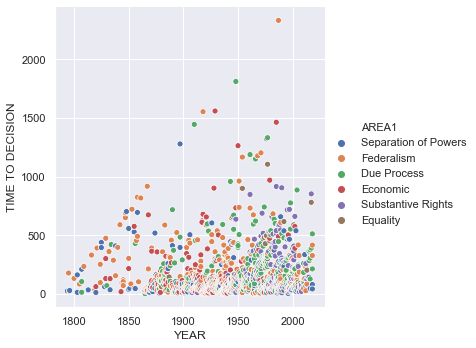

In [101]:
ax = sns.relplot(data=df, x='YEAR', y='TIME TO DECISION', hue='AREA1')


In [24]:
#decision time per issue area
df.groupby(by='AREA1')['TIME TO DECISION'].mean()

AREA1
Due Process             195.380062
Economic                134.905085
Equality                274.568182
Federalism              190.515823
Separation of Powers    147.530864
Substantive Rights      223.329412
Name: TIME TO DECISION, dtype: float64

In [25]:
#decision time per decade
#output: line chart with x= decade y= time, lines= issue areas 
df.groupby(by='DECADE')['TIME TO DECISION'].mean()

DECADE
1790     62.250000
1800    118.250000
1810    132.666667
1820    236.636364
1830    232.500000
1840    343.000000
1850    361.882353
1860    190.250000
1870    113.295455
1880    162.469388
1890    130.148148
1900    108.603448
1910    148.228916
1920    127.954955
1930    106.721429
1940    168.038095
1950    212.645570
1960    247.912500
1970    240.380165
1980    228.428571
1990    216.670732
2000    194.704918
2010    223.000000
Name: TIME TO DECISION, dtype: float64

In [139]:
df.AREA1.value_counts()

Due Process             321
Federalism              316
Economic                295
Substantive Rights      170
Separation of Powers    162
Equality                 44
Name: AREA1, dtype: int64

In [85]:
#decisions per issue area per decade
df.groupby(by='DECADE').AREA1.value_counts().unstack()

AREA1,Due Process,Economic,Equality,Federalism,Separation of Powers,Substantive Rights
DECADE,,,,,,
1790,NaN,NaN,NaN,2.0,2.0,NaN
1800,2.0,NaN,NaN,3.0,3.0,NaN
1810,NaN,NaN,NaN,2.0,1.0,NaN
1820,NaN,3.0,NaN,4.0,4.0,NaN
1830,2.0,1.0,NaN,3.0,2.0,NaN
1840,NaN,2.0,NaN,7.0,1.0,NaN
1850,1.0,3.0,NaN,7.0,6.0,NaN
1860,2.0,3.0,NaN,7.0,4.0,NaN
1870,7.0,14.0,NaN,11.0,10.0,2.0


In [86]:
df.groupby(by='DECADE').EFFECT.value_counts().unstack()

EFFECT,struck down as applied,struck down on face,upheld
DECADE,,,
1790,NaN,1.0,3.0
1800,2.0,2.0,4.0
1810,NaN,NaN,3.0
1820,2.0,NaN,9.0
1830,4.0,NaN,4.0
1840,NaN,1.0,9.0
1850,6.0,1.0,10.0
1860,1.0,4.0,11.0
1870,11.0,4.0,29.0


In [28]:
#if attorney general presented arguments this was the decision
df.EFFECT.value_counts()

upheld                    963
struck down as applied    189
struck down on face       156
Name: EFFECT, dtype: int64

In [32]:
df['TIME TO DECISION'].describe()

count    1308.000000
mean      180.935780
std       224.883063
min         1.000000
25%        47.000000
50%       102.000000
75%       233.000000
max      2332.000000
Name: TIME TO DECISION, dtype: float64

In [33]:
df[df['AREA1'] == 'Federalism']

,CASE,DATE,YEAR,DECADE,EFFECT,STAT NAME,PL #,S-DATE,TIME TO DECISION,CONGRESS,AREA1,LNDMRK,LNDDTL,ATT GEN,CERT,REVERSD,CRS,GVT PRTY,DISSENT,H-CT
1,Penhallow v. Doane's Adm'rs,2/24/1795,1795,1790,upheld,Court of Appeals Resolution,NaN,5/24/1780,177,0,Federalism,0.0,0.0,1,0,1.0,0.0,0,0,1
2,Hylton v. United States,3/8/1796,1796,1790,upheld,Carriage Tax Act,2-33,6/5/1794,21,3,Federalism,0.0,0.0,1,0,0.0,0.0,1,0,1
4,Mossman v. Higginson,8/11/1800,1800,1800,struck down as applied,Judiciary Act of 1789,1-20,9/24/1789,131,1,Federalism,1.0,0.0,0,0,0.0,0.0,0,0,0
7,United States v. Fisher,2/21/1805,1805,1800,upheld,Effectual Settlement of Accounts Act,4-19,3/3/1797,83,4,Federalism,0.0,0.0,1,0,1.0,0.0,1,0,0
11,Hodgson v. Bowerbank,2/1/1809,1809,1800,struck down as applied,Judiciary Act of 1789,1-20,9/24/1789,233,1,Federalism,1.0,0.0,0,0,0.0,0.0,0,0,0
13,Martin v. Hunter's Lessee,3/20/1816,1816,1810,upheld,Judiciary Act of 1789,1-20,9/24/1789,330,1,Federalism,1.0,0.0,0,0,0.0,0.0,0,0,1
14,McCulloch v. Maryland,3/6/1819,1819,1810,upheld,Incorporation of the Bank of the United States,14-44,4/10/1816,35,14,Federalism,1.0,1.0,1,0,1.0,0.0,1,0,0
17,Cohens v. Virginia,3/5/1821,1821,1820,upheld,Judiciary Act of 1789,1-20,9/24/1789,390,1,Federalism,1.0,0.0,0,0,0.0,0.0,0,0,1
18,Gibbons v. Ogden,3/2/1824,1824,1820,upheld,Licensing Act,2-8,2/18/1793,251,2,Federalism,0.0,0.0,1,0,1.0,0.0,0,0,1
19,"Osborn v. President, Directors & Co. of Bank",3/19/1824,1824,1820,upheld,Incorporation of the Bank of the United States,14-44,4/10/1816,95,14,Federalism,1.0,0.0,0,0,0.0,0.0,1,1,0
